In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
sniffer_data = '../sniffer.csv'

In [4]:
if not os.path.exists(sniffer_data):
    print('Unavaliable sniffer data')
else:
    print('Sniffer data found')

Sniffer data found


In [5]:
df = pd.read_csv(sniffer_data)

In [6]:
df.head()

,timestamp,from,destiny,protocol,length
0,2024-07-23 14:54:05.432836,192.168.0.16,224.0.0.252,UDP,69
1,2024-07-23 14:54:05.440653,192.168.0.16,224.0.0.251,UDP,169
2,2024-07-23 14:54:05.443524,192.168.0.16,224.0.0.251,UDP,169
3,2024-07-23 14:54:07.582458,192.168.0.9,224.0.0.251,UDP,317
4,2024-07-23 14:54:09.120146,192.168.0.9,224.0.0.251,UDP,844


# General Statistics

In [6]:
total_packets = len(df)
print(f"Total packets captured: {total_packets}")

protocol_counts = df['protocol'].value_counts()
print("\nNumber of packets by protocol:")
print(protocol_counts)

top_src_ips = df['from'].value_counts().head(5)
print("\nTop 5 source IP addresses with the most traffic:")
print(top_src_ips)

top_dst_ips = df['destiny'].value_counts().head(5)
print("\nTop 5 destination IP addresses with the most traffic:")
print(top_dst_ips)


Total packets captured: 2781

Number of packets by protocol:
protocol
UDP     2252
TCP      422
ICMP      94
IGMP      13
Name: count, dtype: int64

Top 5 source IP addresses with the most traffic:
from
192.168.0.3        1379
192.168.0.17        568
192.168.0.1         318
192.168.0.16        164
162.159.136.234     110
Name: count, dtype: int64

Top 5 destination IP addresses with the most traffic:
destiny
224.0.0.251        1588
192.168.0.17        587
192.168.0.1         270
162.159.136.234     110
162.247.243.29       76
Name: count, dtype: int64


In [7]:
sns.set(style="whitegrid")

# Packets by Protocol

/tmp/ipykernel_433650/1759928972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=protocol_counts.index, y=protocol_counts.values, palette="viridis")


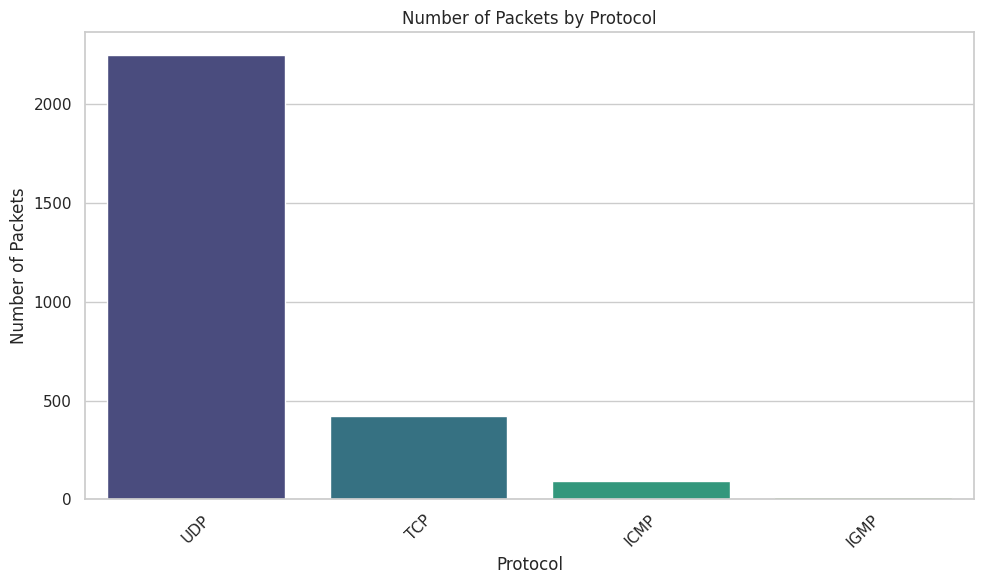

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=protocol_counts.index, y=protocol_counts.values, palette="viridis")
plt.title("Number of Packets by Protocol")
plt.xlabel("Protocol")
plt.ylabel("Number of Packets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("protocol_counts.png")
plt.show()

# Top 5 source IP Address

/tmp/ipykernel_433650/3957642875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_src_ips.index, y=top_src_ips.values, palette="viridis")


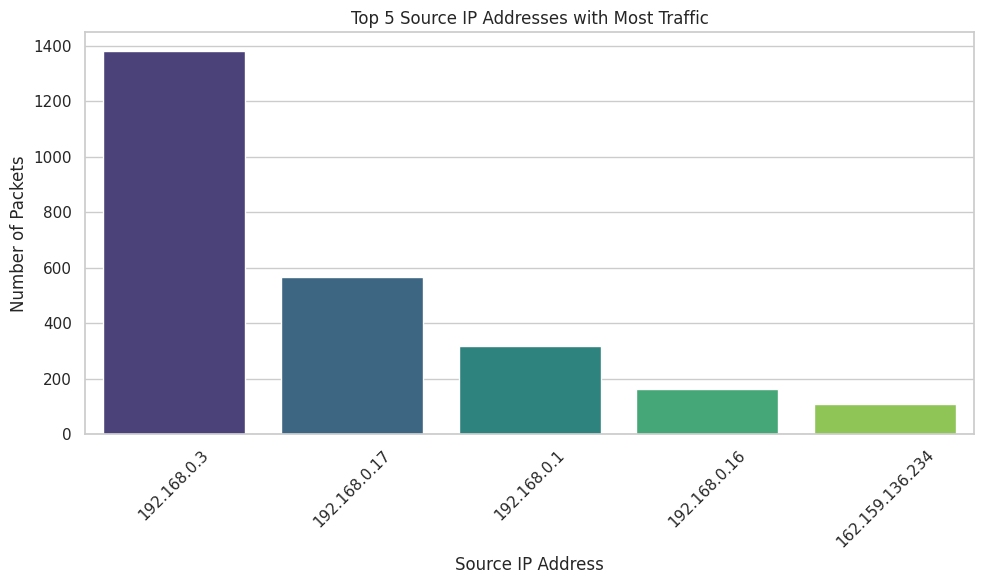

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_src_ips.index, y=top_src_ips.values, palette="viridis")
plt.title("Top 5 Source IP Addresses with Most Traffic")
plt.xlabel("Source IP Address")
plt.ylabel("Number of Packets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_src_ips.png")
plt.show()

# Top 5 Destination IP's

/tmp/ipykernel_433650/2967261599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dst_ips.index, y=top_dst_ips.values, palette="viridis")


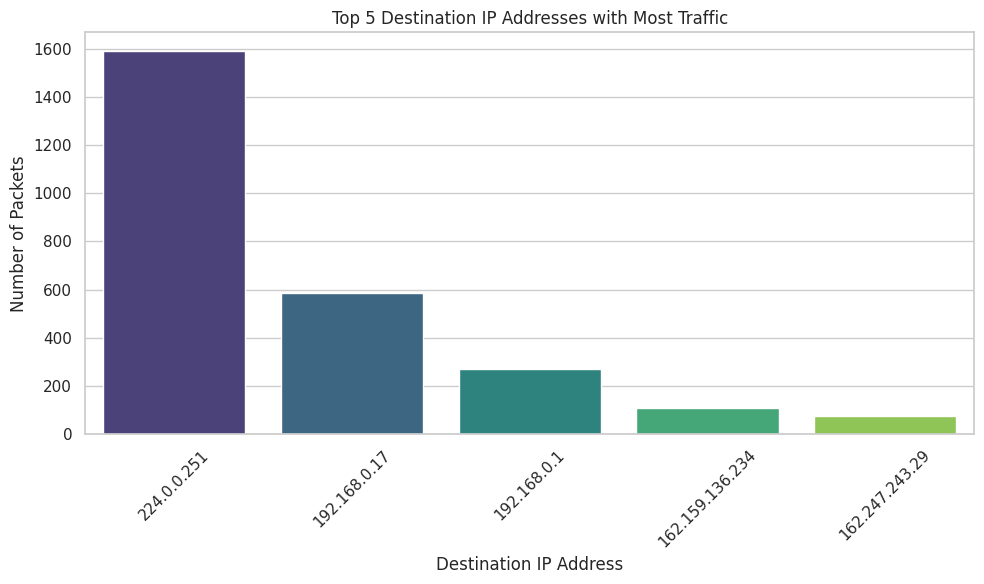

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dst_ips.index, y=top_dst_ips.values, palette="viridis")
plt.title("Top 5 Destination IP Addresses with Most Traffic")
plt.xlabel("Destination IP Address")
plt.ylabel("Number of Packets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_dst_ips.png")
plt.show()

# Traffic Volume Over Time

/tmp/ipykernel_469983/3706288049.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  traffic_volume = df.resample('T').size()


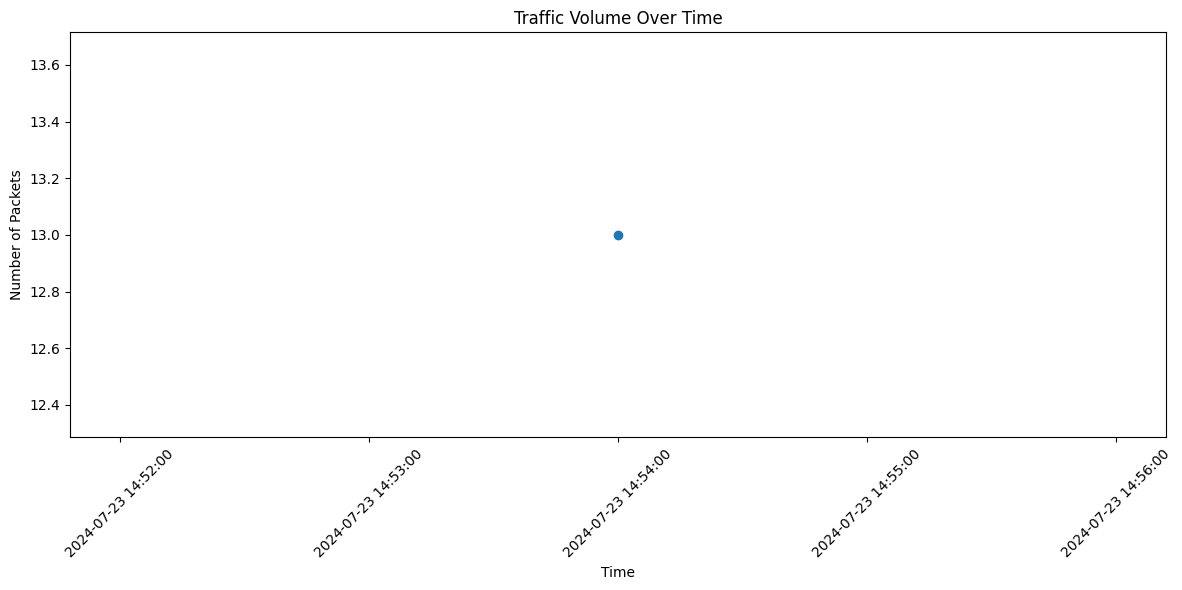

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.floor('s')

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Resample by minute and count the number of packets
traffic_volume = df.resample('T').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(traffic_volume.index, traffic_volume.values, marker='o', linestyle='-')

# Formatting x-axis to show both date and time
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=1))

plt.title("Traffic Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Packets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("traffic_volume_over_time.png")
plt.show()

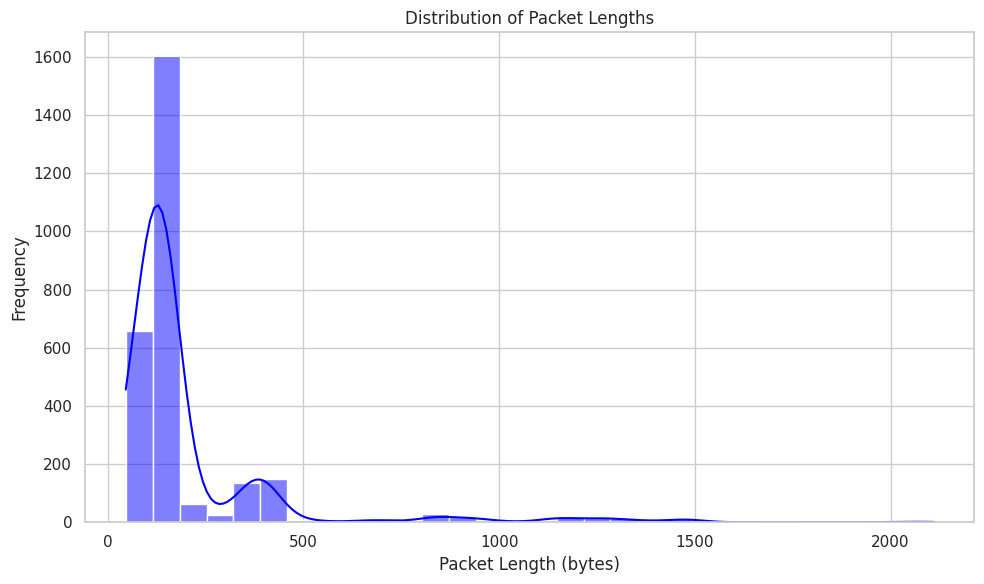

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Packet Lengths")
plt.xlabel("Packet Length (bytes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("packet_length_distribution.png")
plt.show()

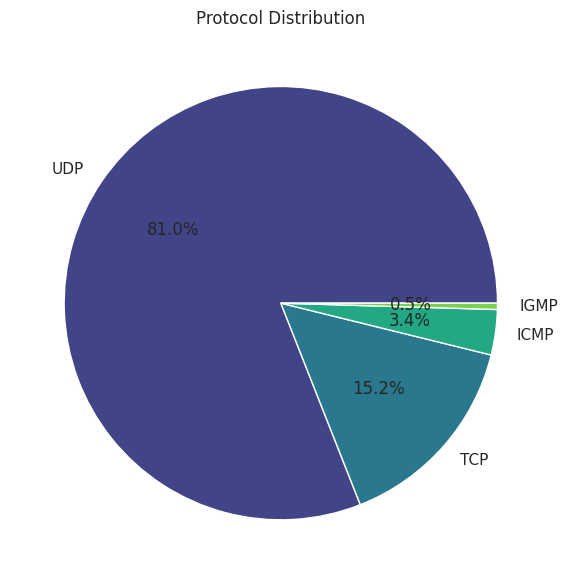

In [13]:
plt.figure(figsize=(10, 6))
protocol_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("viridis", len(protocol_counts)))
plt.title("Protocol Distribution")
plt.ylabel("")  # Hide the y-label
plt.tight_layout()
plt.savefig("protocol_distribution.png")
plt.show()

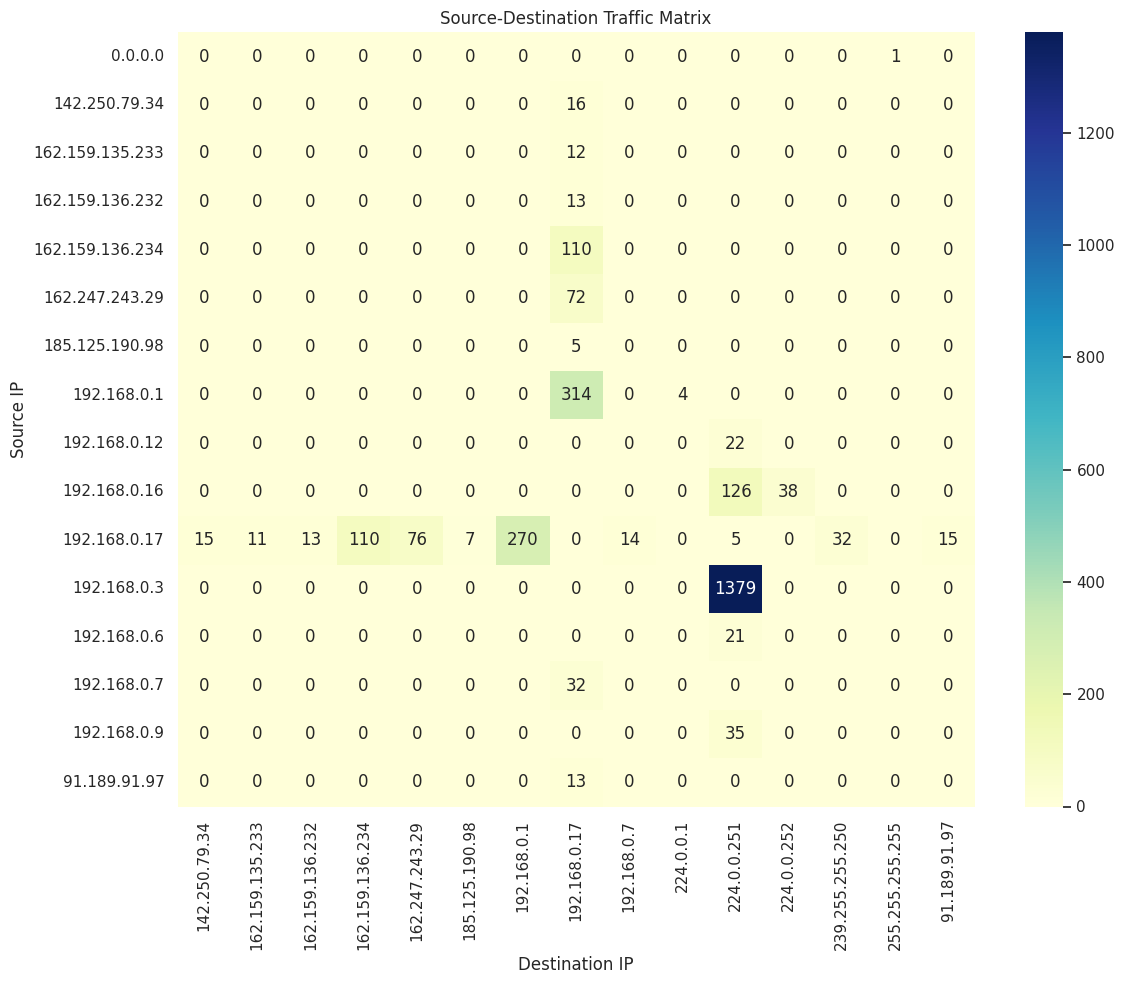

In [14]:
traffic_matrix = pd.crosstab(df['from'], df['destiny'])

plt.figure(figsize=(12, 10))
sns.heatmap(traffic_matrix, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Source-Destination Traffic Matrix")
plt.xlabel("Destination IP")
plt.ylabel("Source IP")
plt.tight_layout()
plt.savefig("traffic_matrix.png")
plt.show()